# 과제
1. 2019.01~06 중에 언제 지하철을 가장 많이이용했을까? (기준:승하자총승객수)
2. 가설)1월~6월 중에 5월에 지하철 승객수가 많다? (기준:승하자총승객수)
3. 가설) 요일 중에서 목요일에 지하철 승객수가 많다? (기준:승하자총승객수)
4. 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 그려볼까요? (pointplot)
5. 가장 승객이 많은 타는 승차역은?
6. 노선별로 역별/요일별 승차승객수를 비교해볼 수 있을까? (1~9호선, 역별/요일별 heatmap)
7. 1호선에서 가장 하자를 많이 하는 역은? (groupby)
8. 2호선중에서 어느 역에서 승차가 많이 발생할까 (Folium역 표시)


In [2]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인

{'Arial',
 'Artifakt Element',
 'Bahnschrift',
 'Batang',
 'Calibri',
 'Cambria',
 'Candara',
 'Cascadia Code',
 'Cascadia Mono',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Corbel',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Franklin Gothic Medium',
 'Gabriola',
 'Gadugi',
 'Georgia',
 'Gulim',
 'HCR Batang',
 'HCR Batang Ext',
 'HCR Batang ExtB',
 'HCR Dotum',
 'HCR Dotum Ext',
 'Haan Wing2',
 'Hancom Gothic',
 'HancomEQN',
 'HoloLens MDL2 Assets',
 'HyhwpEQ',
 'Impact',
 'Ink Free',
 'Javanese Text',
 'Leelawadee UI',
 'Lucida Console',
 'Lucida Sans Unicode',
 'MS Gothic',
 'MV Boli',
 'Malgun Gothic',
 'Marlett',
 'Microsoft Himalaya',
 'Microsoft JhengHei',
 'Microsoft New Tai Lue',
 'Microsoft PhagsPa',
 'Microsoft Sans Serif',
 'Microsoft Tai Le',
 'Microsoft YaHei',
 'Microsoft Yi Baiti',
 'MingLiU-ExtB',
 'Mongolian Baiti',
 'Myanmar Text',
 'NewJumja',
 'Nirmala UI',
 'Palatino Linot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
mpl.rc('font', family='LG Smart UI') # 자신의 OS에 존재하는 한글 폰트를 선택

In [4]:
# kt "지하철 이용승객 분석" EDA 프로젝트(1)로 생성된 파일을 활용

file = './subway_raw.csv'
raw = pd.read_csv(file)
raw.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


# 2019.01~06 중에 언제 지하철을 가장 많이이용했을까? (기준:승하차총승객수)

In [5]:
max_passenger = raw[raw['승하차총승객수'] == max(raw['승하차총승객수'])]
max_passenger

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
5943,2019-01-11,목,2호선,강남,132727.0,137826.0,270553.0,2019-01,01-11,20190114


# 가설)1월~6월 중에 5월에 지하철 승객수가 많다? (기준:승하자총승객수) 

In [6]:
raw.groupby(['연월'])['승하차총승객수'].sum()

연월
2019-01    442746389.0
2019-02    379836010.0
2019-03    466692826.0
2019-04    470934348.0
2019-05    485718557.0
2019-06    442210635.0
Name: 승하차총승객수, dtype: float64

5월의 지하철 승객수가 485718557.0로 가장 많은 것을 알 수 있다. -> 가설 성립

# 가설) 요일 중에서 목요일에 지하철 승객수가 많다? (기준:승하자총승객수)

In [7]:
raw.groupby(['요일'])['승하차총승객수'].sum()

요일
금    341950018.0
목    445310717.0
수    428684383.0
월    411979965.0
일    391555551.0
토    247523995.0
화    421134136.0
Name: 승하차총승객수, dtype: float64

목요일이 445310717.0로 지하철 승객수가 가장 많은 것을 알 수 있다. ->성립

# 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프 그려볼까요? (pointplot)

<AxesSubplot:xlabel='월일', ylabel='승하차총승객수'>

findfont: Font family ['LG Smart UI'] not found. Falling back to DejaVu Sans.
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from cur

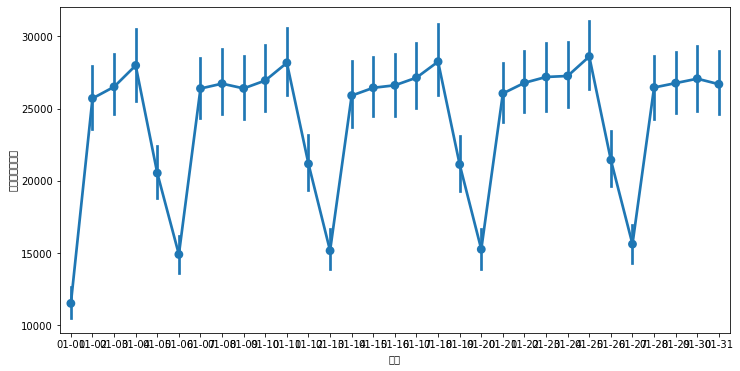

In [8]:
#2019-01
df = raw[raw['연월'] == '2019-01']
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x=df['월일'], y=df['승하차총승객수'])

<AxesSubplot:xlabel='월일', ylabel='승하차총승객수'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

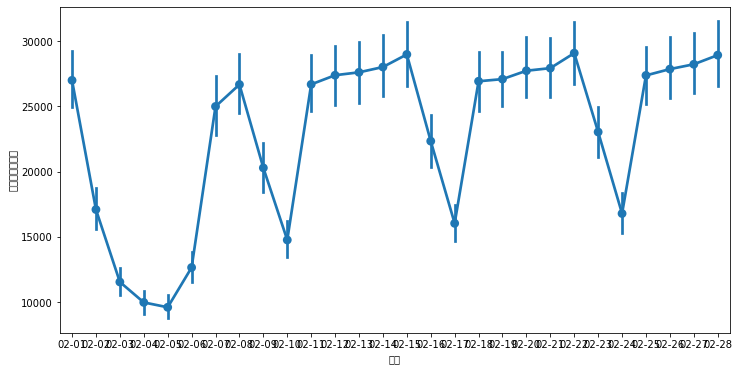

In [9]:
#2019-02
df = raw[raw['연월'] == '2019-02']
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x=df['월일'], y=df['승하차총승객수'])

<AxesSubplot:xlabel='월일', ylabel='승하차총승객수'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

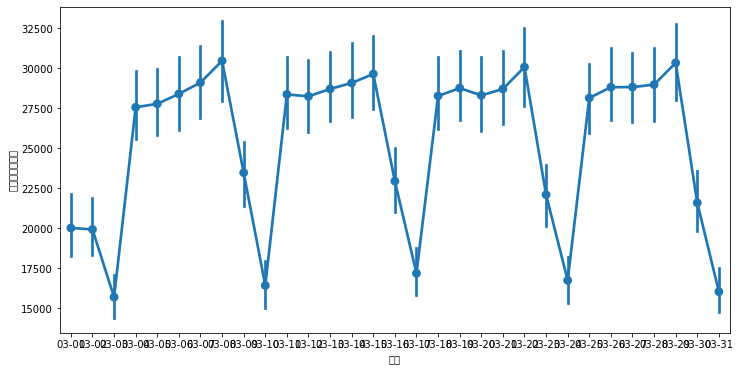

In [10]:
#2019-03
df = raw[raw['연월'] == '2019-03']
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x=df['월일'], y=df['승하차총승객수'])

<AxesSubplot:xlabel='월일', ylabel='승하차총승객수'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

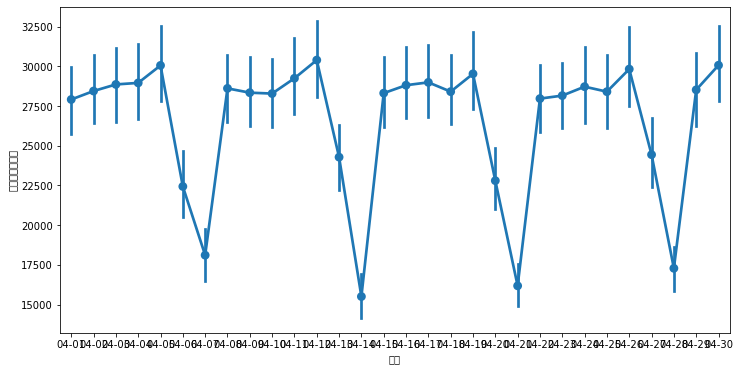

In [11]:
#2019-04
df = raw[raw['연월'] == '2019-04']
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x=df['월일'], y=df['승하차총승객수'])

<AxesSubplot:xlabel='월일', ylabel='승하차총승객수'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

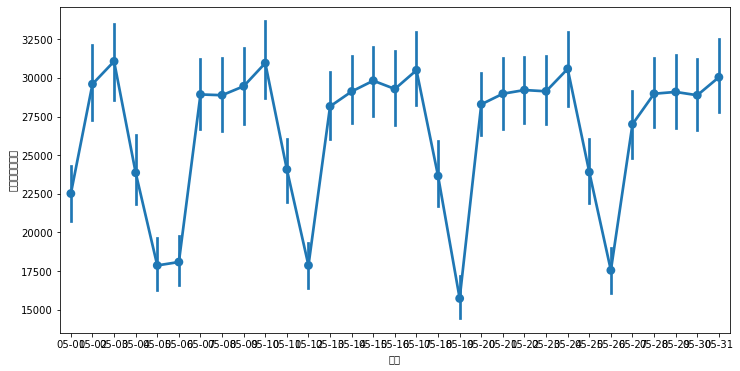

In [12]:
#2019-05
df = raw[raw['연월'] == '2019-05']
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x=df['월일'], y=df['승하차총승객수'])

<AxesSubplot:xlabel='월일', ylabel='승하차총승객수'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

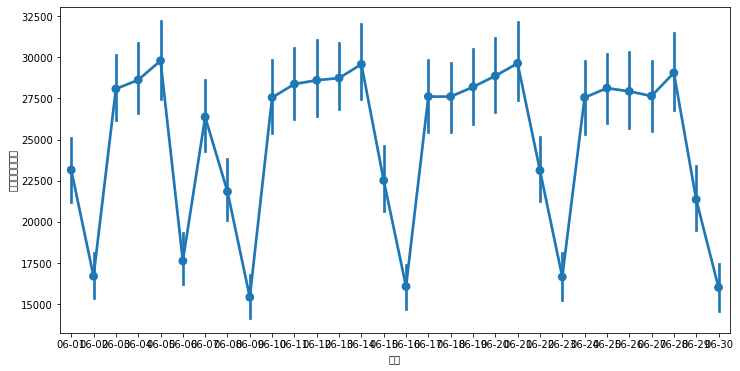

In [13]:
#2019-06
df = raw[raw['연월'] == '2019-06']
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x=df['월일'], y=df['승하차총승객수'])

# 가장 승객이 많은 타는 승차역은?

In [14]:
max_passenger_station = raw[raw['승차총승객수'] == max(raw['승차총승객수'])]
max_passenger_station

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
5943,2019-01-11,목,2호선,강남,132727.0,137826.0,270553.0,2019-01,01-11,20190114


# 노선별로 역별/요일별 승차승객수를 비교해볼 수 있을까? (1~9호선, 역별/요일별 heatmap)

In [15]:
#1호선
df = raw[raw['노선명'] == '1호선']
pivot_df1 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df1

요일,금,목,수,월,일,토,화
역명,,,,,,,
가능,6596.384615,8108.538462,7904.000000,7744.307692,7800.56,5023.000000,7879.653846
가산디지털단지,13502.788462,34915.961538,34807.846154,33971.846154,34027.12,10332.192308,34199.384615
간석,5762.307692,7625.653846,7445.769231,7227.846154,7201.68,4174.769231,7331.653846
개봉,22699.461538,27224.192308,26921.807692,26015.538462,25867.28,16335.000000,26683.192308
관악,7885.730769,9582.692308,9486.730769,9237.153846,9040.40,6551.923077,9278.846154
...,...,...,...,...,...,...,...
천안,8381.423077,8177.615385,7776.615385,7834.115385,7681.52,7623.038462,7613.076923
평택,16107.769231,15759.384615,14162.000000,13958.615385,14178.20,13542.730769,14098.538462
화서,7337.807692,9670.269231,9583.615385,9362.153846,9295.40,5355.346154,9467.769231


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

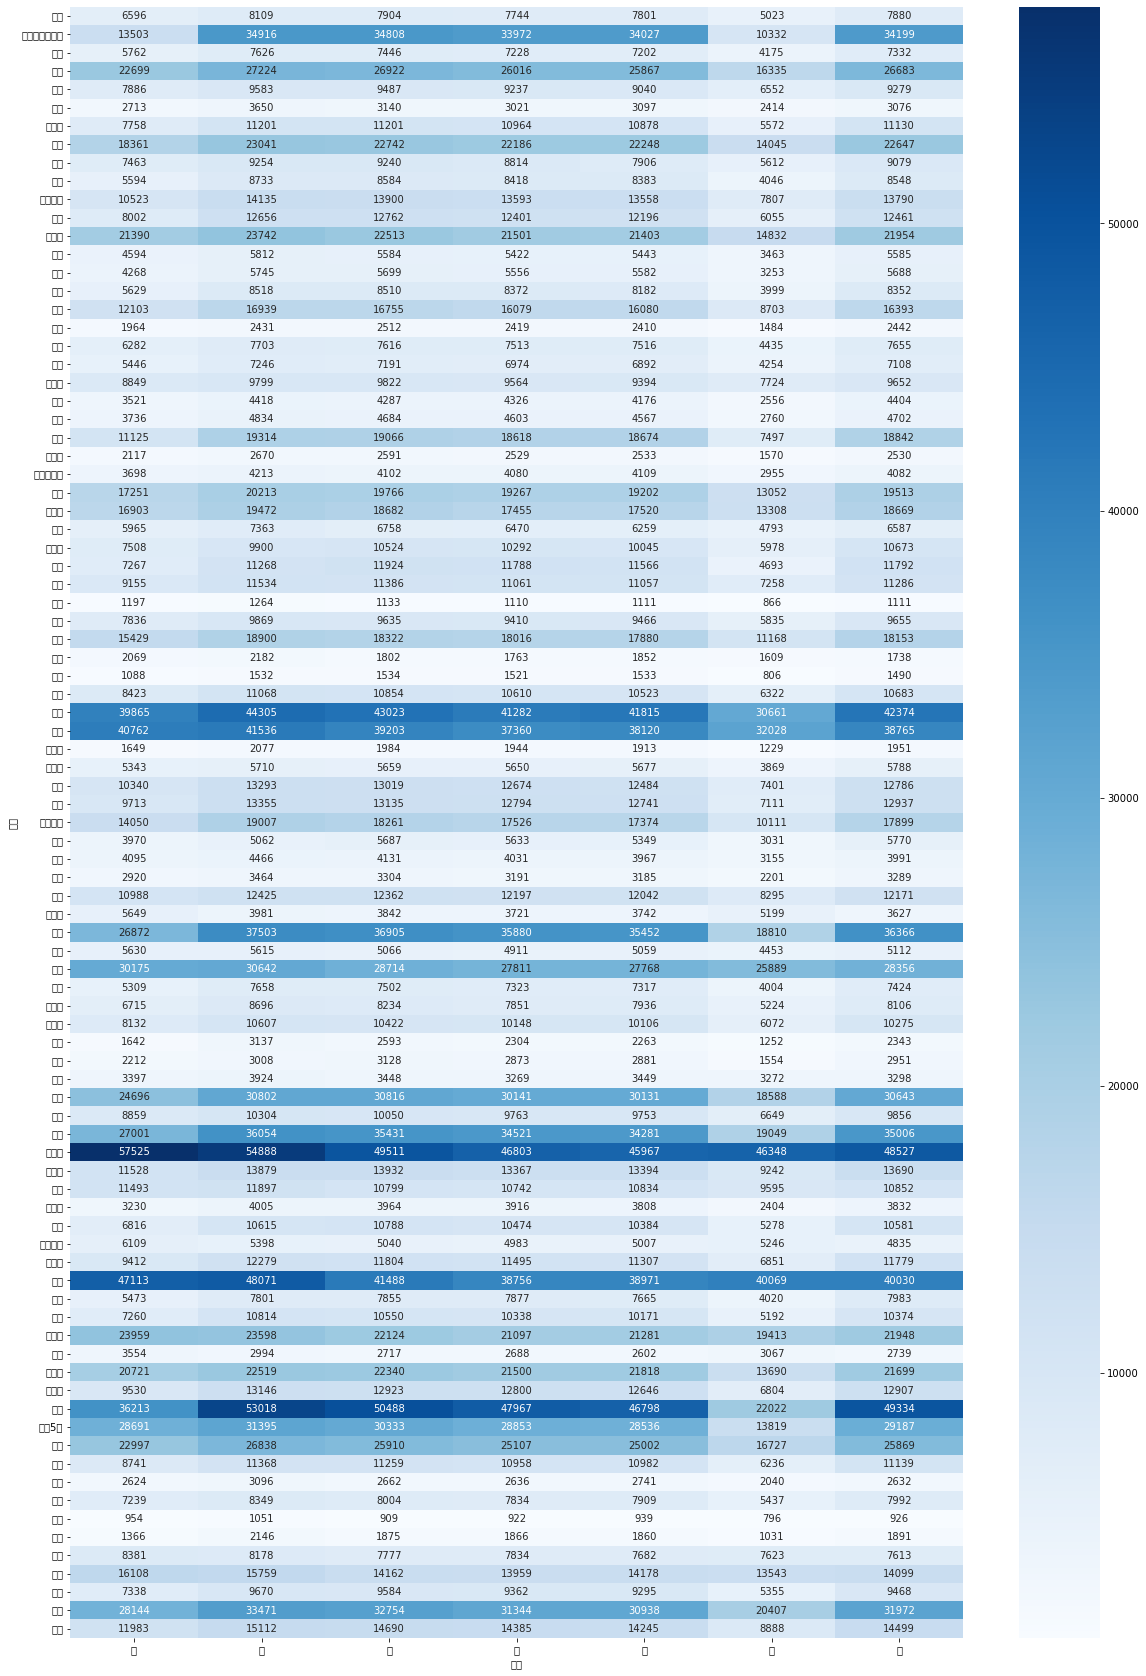

In [16]:
plt.figure(figsize=(20, 30))
sns.heatmap(pivot_df1, cmap="Blues", annot=True, fmt='.0f')

In [17]:
#2호선
df = raw[raw['노선명'] == '2호선']
pivot_df2 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df2

요일,금,목,수,월,일,토,화
역명,,,,,,,
강남,90434.500000,120495.115385,113716.192308,107031.307692,105741.640000,53996.115385,110653.038462
강변,49631.000000,53095.730769,46554.269231,43479.423077,44993.640000,37167.461538,44788.307692
건대입구,32876.442308,34240.980769,32162.519231,30108.384615,29991.100000,24546.923077,31143.596154
교대,17002.230769,31194.384615,30638.153846,29441.480769,28717.400000,10165.576923,30031.519231
구로디지털단지,46734.038462,74905.153846,73254.615385,70880.307692,70119.520000,33996.423077,72088.961538
구의,19883.346154,28428.076923,27825.769231,26791.692308,26458.640000,13812.807692,27320.807692
까치산,25976.346154,34906.153846,34024.423077,33052.807692,32972.920000,19208.653846,33667.846154
낙성대,27333.961538,34800.269231,33309.192308,32252.461538,31421.920000,19211.230769,32672.653846
당산,17247.019231,24248.961538,23524.307692,22560.250000,21939.600000,11750.961538,22881.269231


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

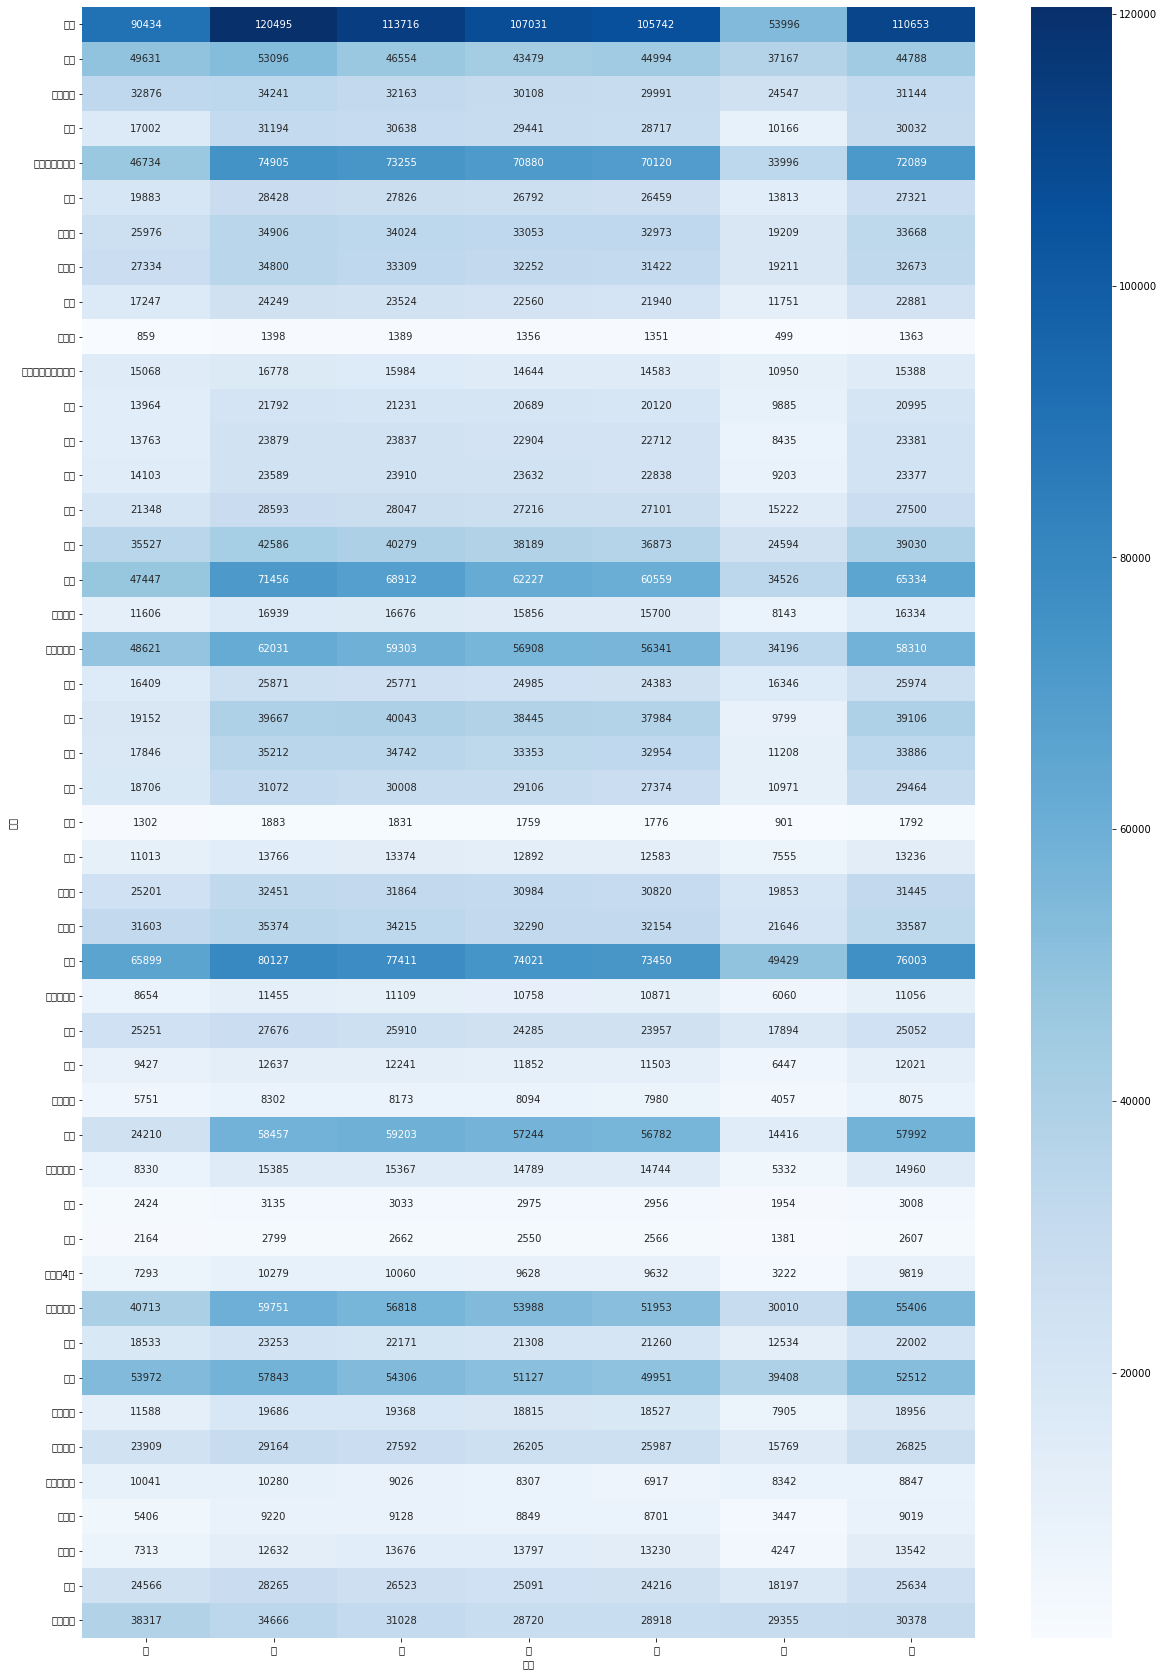

In [18]:
plt.figure(figsize=(20, 30))
sns.heatmap(pivot_df2, cmap="Blues", annot=True, fmt='.0f')

In [19]:
#3호선
df = raw[raw['노선명'] == '3호선']
pivot_df3 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df3

요일,금,목,수,월,일,토,화
역명,,,,,,,
가락시장,7513.346154,10662.980769,10273.903846,9892.557692,9788.520000,4426.134615,9997.769231
경복궁,24606.153846,29634.846154,28206.692308,25368.192308,25363.080000,15758.615385,28157.653846
경찰병원,5156.461538,9191.115385,9061.653846,8836.769231,8891.520000,3541.230769,8986.653846
고속터미널,38747.679487,36649.000000,31184.230769,29216.487179,29634.493333,30254.730769,30341.461538
구파발,18669.461538,24299.846154,23785.230769,22992.384615,22792.240000,13956.423077,23533.769231
금호,7453.269231,10089.538462,9788.192308,9474.384615,9344.120000,5390.230769,9677.500000
남부터미널,33040.692308,42604.115385,38346.423077,36365.346154,35745.720000,22078.653846,37003.038462
녹번,11545.153846,16311.769231,16026.730769,15515.038462,15307.200000,7855.000000,15707.692308
대곡,1525.307692,2037.692308,2003.346154,1950.807692,1925.520000,1167.807692,1955.653846


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anacond

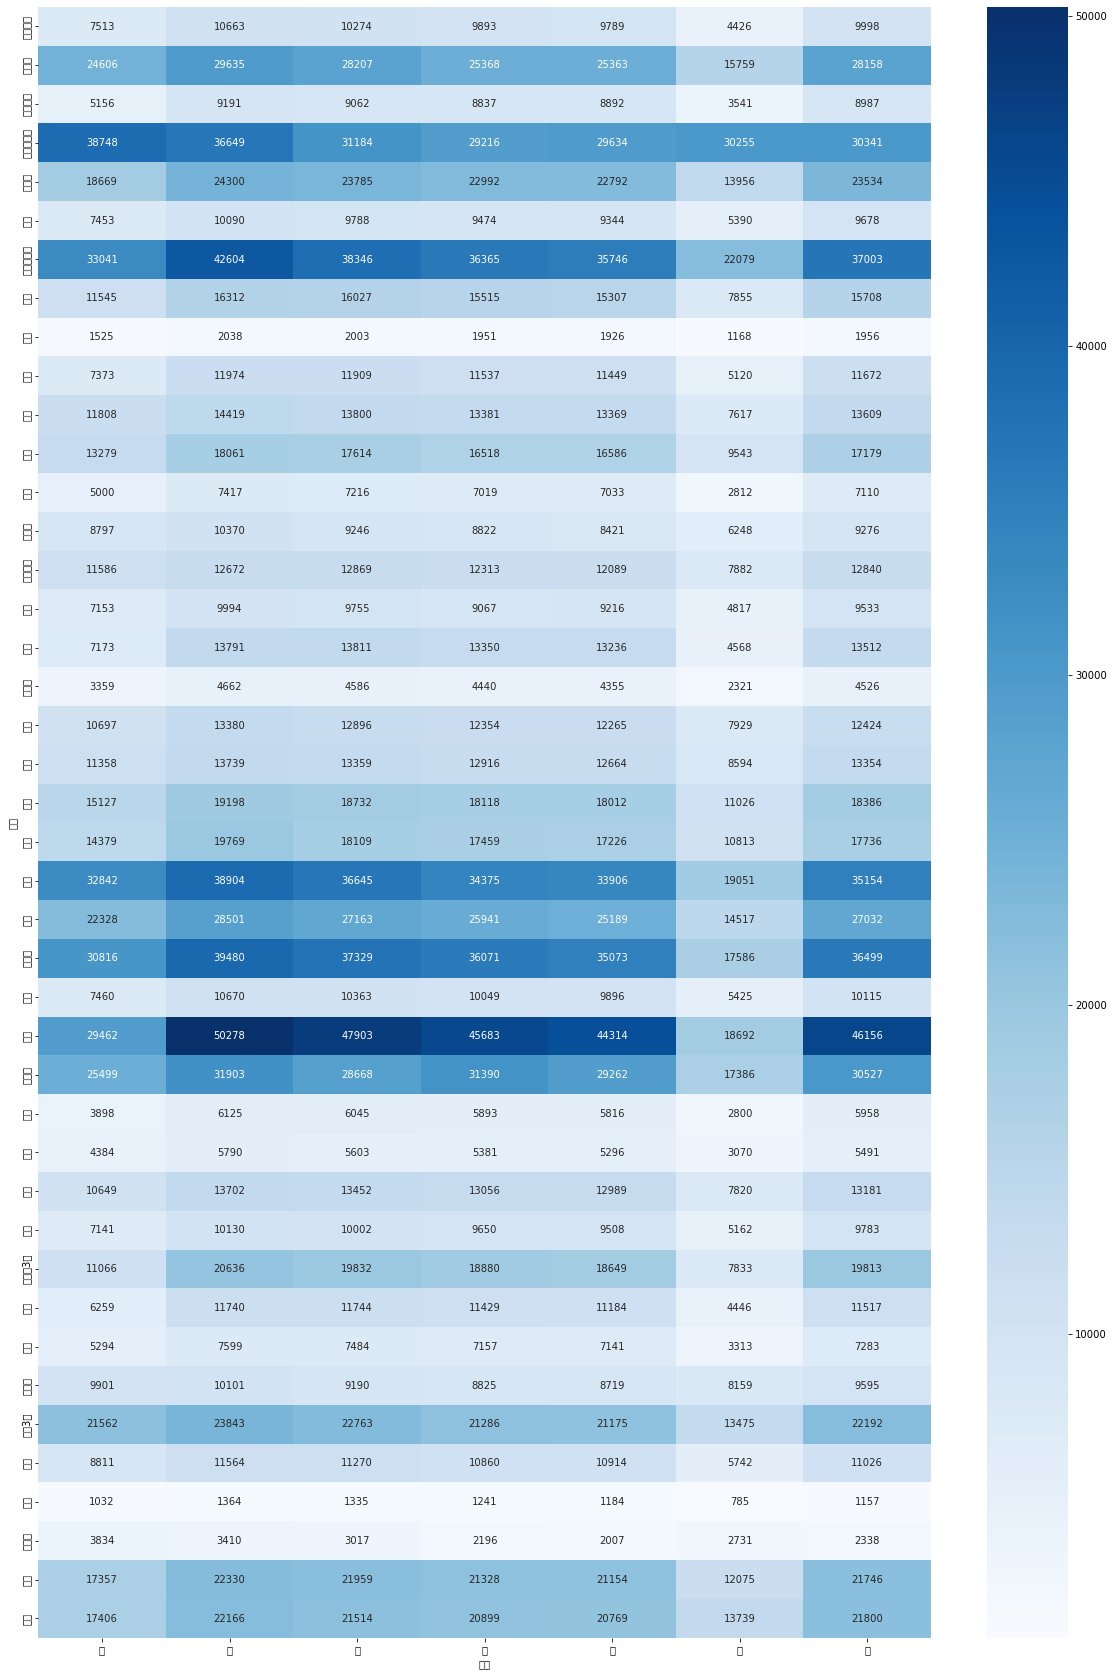

In [20]:
plt.figure(figsize=(20, 30))
sns.heatmap(pivot_df3, cmap="Blues", annot=True, fmt='.0f')

In [21]:
#4호선
df = raw[raw['노선명'] == '4호선']
pivot_df4 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df4

요일,금,목,수,월,일,토,화
역명,,,,,,,
경마공원,14777.730769,8312.884615,2647.192308,1194.153846,1112.600000,18468.000000,2675.653846
고잔,8130.076923,9855.307692,9790.653846,9465.500000,9478.480000,5921.384615,9578.461538
과천,4914.000000,6126.461538,5856.423077,5695.153846,5458.160000,3508.615385,5829.807692
금정,23623.576923,30995.076923,30122.692308,29322.500000,29056.800000,17964.192308,29691.423077
길음,19637.884615,27063.461538,26943.730769,26207.653846,25604.720000,13895.461538,26626.653846
남태령,1732.115385,1905.346154,1741.884615,1680.615385,1603.200000,1076.307692,1672.192308
노원,20403.211538,24923.230769,23754.307692,22724.115385,22628.140000,15173.211538,23447.596154
당고개,11905.307692,14692.923077,14415.615385,14019.423077,13881.400000,9396.076923,14142.038462
대공원,9687.692308,5602.923077,4274.692308,4074.307692,3450.280000,7017.115385,4411.384615


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

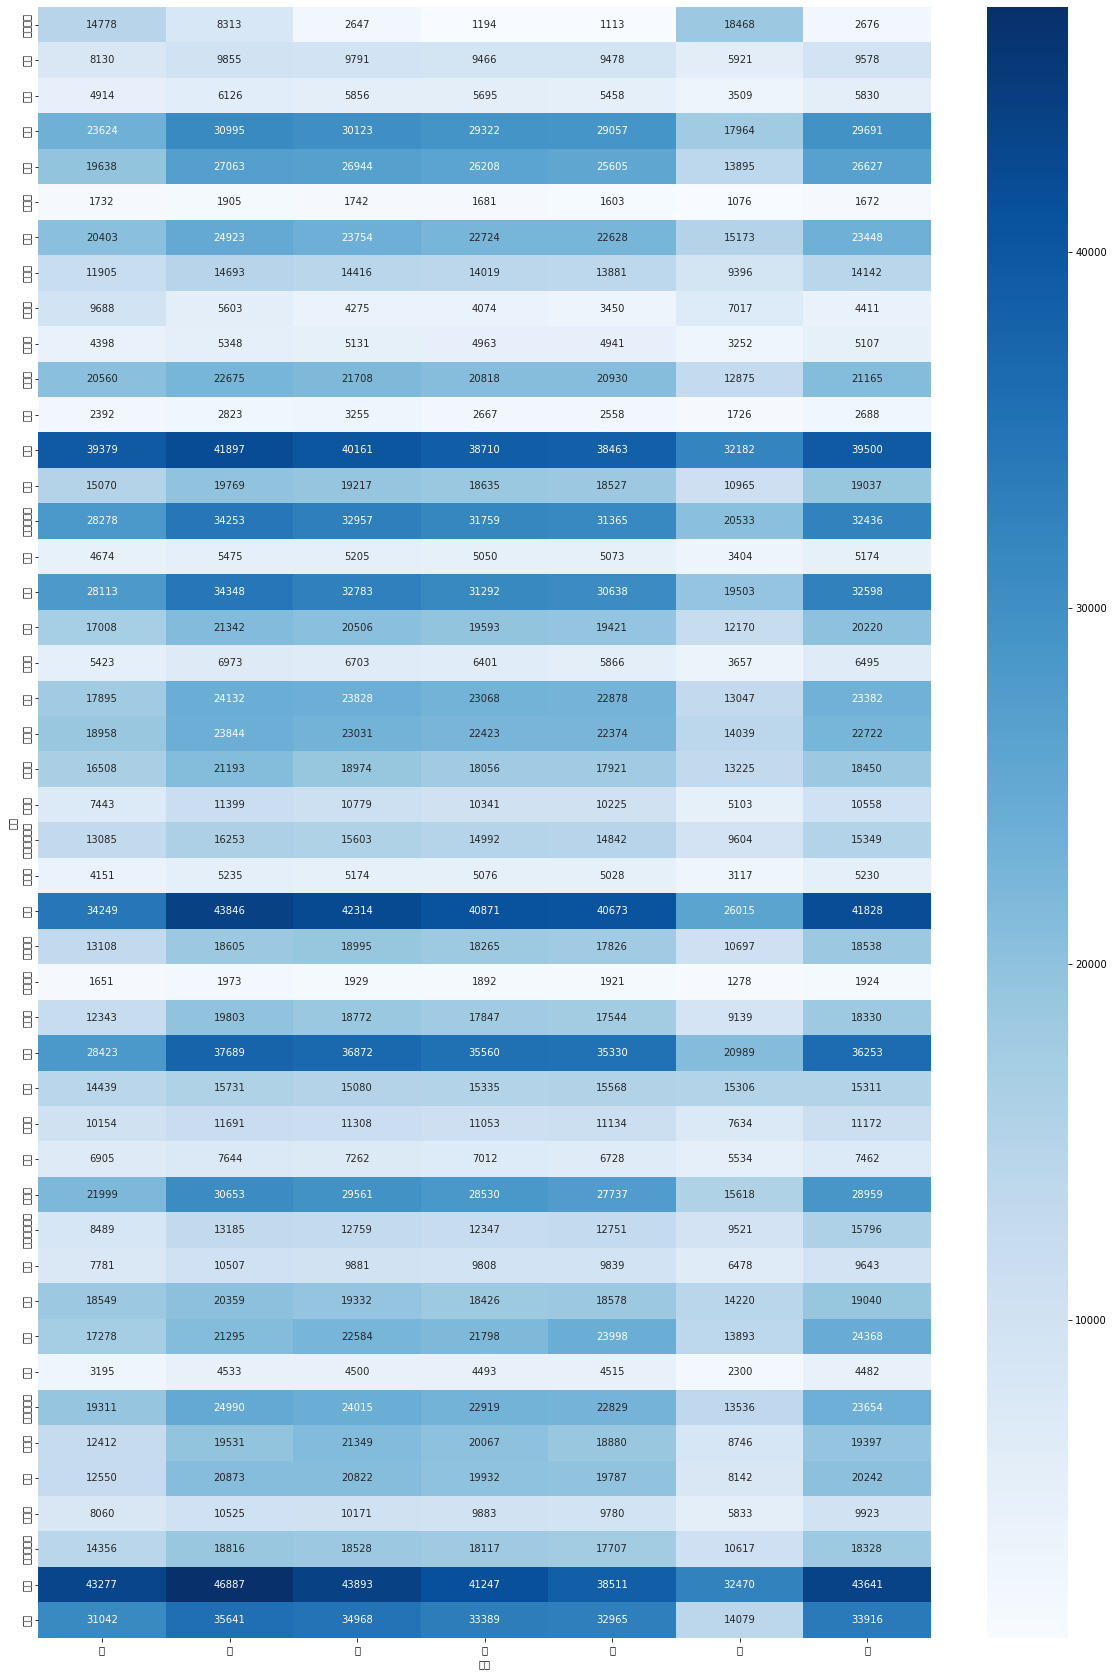

In [22]:
plt.figure(figsize=(20, 30))
sns.heatmap(pivot_df4, cmap="Blues", annot=True, fmt='.0f')

In [23]:
#5호선
df = raw[raw['노선명'] == '5호선']
pivot_df5 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df5

요일,금,목,수,월,일,토,화
역명,,,,,,,
강동,17378.153846,22981.076923,22492.269231,21977.730769,21677.0800,11820.923077,22174.769231
개롱,5699.461538,8109.423077,7983.923077,7646.346154,7611.5600,3911.461538,7910.807692
개화산,4733.692308,6965.000000,6858.653846,6719.615385,6646.2800,3431.884615,6795.500000
거여,6122.730769,8992.423077,8818.884615,8615.038462,8471.8400,4309.961538,8702.461538
고덕,7667.769231,11564.423077,11290.346154,10932.807692,10773.9600,4865.307692,11139.115385
광나루,13164.576923,16578.423077,16001.115385,15721.653846,15306.8400,9401.115385,15894.923077
광화문,27148.692308,41953.076923,40845.038462,39173.192308,37536.5200,17143.923077,40494.769231
군자,11331.038462,15033.461538,14708.250000,14077.576923,13871.0400,8413.576923,14440.076923
굽은다리,8830.961538,11344.307692,10982.461538,10592.692308,10449.0800,6439.230769,10945.615385


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\

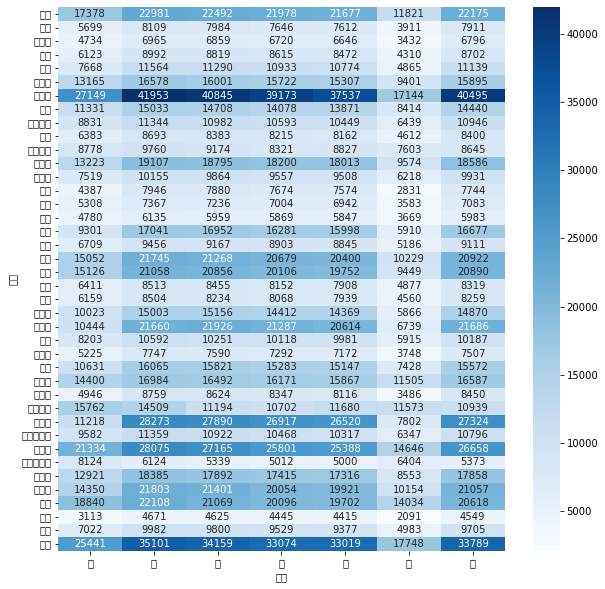

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_df5, cmap="Blues", annot=True, fmt='.0f')

In [25]:
#6호선
df = raw[raw['노선명'] == '6호선']
pivot_df6 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df6

요일,금,목,수,월,일,토,화
역명,,,,,,,
고려대,7801.153846,11028.576923,11188.615385,10824.307692,10817.32,5491.923077,11086.500000
광흥창,6765.769231,11214.538462,11202.769231,10658.961538,10606.76,5331.576923,10918.192308
구산,6691.615385,9326.730769,9053.538462,8780.461538,8768.04,4775.307692,9015.846154
녹사평,7031.769231,6899.269231,6260.730769,5927.000000,5606.44,5189.500000,6136.730769
대흥,7062.307692,10668.923077,10618.961538,10333.692308,10085.92,4586.538462,10500.615385
독바위,2476.769231,3298.153846,3223.038462,3145.576923,3082.96,1847.807692,3208.769231
돌곶이,7009.000000,9883.807692,9783.730769,9388.230769,9409.08,5162.730769,9634.923077
동묘앞,12760.192308,10574.884615,10124.480769,9690.500000,9722.62,11135.442308,9927.711538
마포구청,11799.307692,17227.269231,16854.653846,16494.961538,16068.88,8506.538462,16672.384615


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47140 (\N{HANGUL SYLLABLE RYEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\li

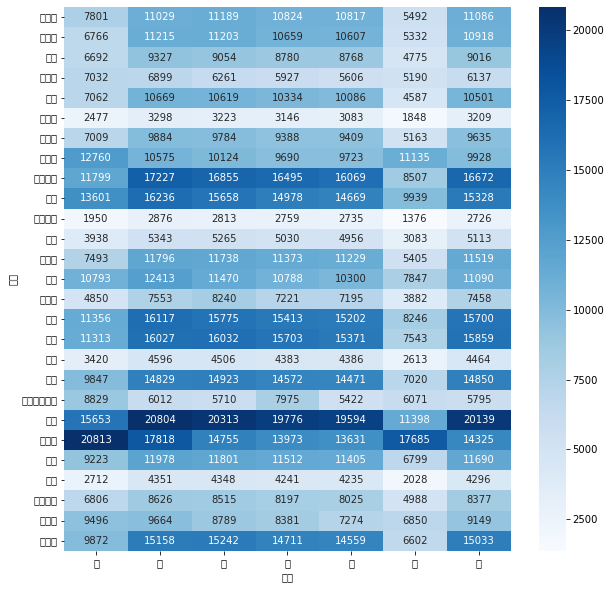

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_df6, cmap="Blues", annot=True, fmt='.0f')

In [27]:
#7호선
df = raw[raw['노선명'] == '7호선']
pivot_df7 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df7

요일,금,목,수,월,일,토,화
역명,,,,,,,
공릉,11140.923077,15463.423077,14822.269231,14293.346154,14128.64,8157.461538,14604.769231
광명사거리,23591.807692,30266.115385,29457.230769,28574.807692,28623.92,17842.846154,29123.384615
굴포천,8045.692308,10648.730769,10456.038462,10170.307692,10073.44,5813.769231,10306.423077
까치울,6578.538462,8770.846154,8682.192308,8417.461538,8234.76,4844.730769,8593.769231
남구로,11021.307692,18519.923077,18425.115385,18356.384615,18498.68,9930.653846,18397.038462
남성,9739.807692,13957.423077,13769.615385,13250.730769,13159.16,6788.307692,13334.153846
내방,9427.076923,16749.461538,16711.615385,16189.000000,16159.96,5969.230769,16373.115385
논현,13367.576923,22985.615385,22451.653846,21790.730769,21775.40,7734.307692,22231.461538
대림,17952.576923,21483.326923,21157.653846,20954.634615,21230.20,17533.096154,21097.980769


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anacond

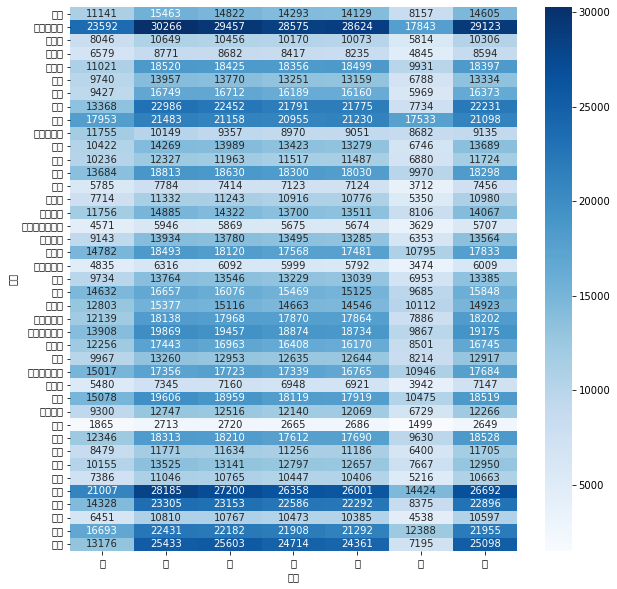

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_df7, cmap="Blues", annot=True, fmt='.0f')

In [29]:
#8호선
df = raw[raw['노선명'] == '8호선']
pivot_df8 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df8

요일,금,목,수,월,일,토,화
역명,,,,,,,
강동구청,7588.076923,12468.807692,12269.038462,11894.576923,11773.80,5576.115385,12142.115385
남한산성입구,11314.038462,16912.423077,16752.461538,16336.923077,16045.68,8092.576923,16450.653846
단대오거리,9498.653846,13188.307692,12759.000000,12547.653846,12314.56,6755.153846,12693.923077
몽촌토성,5844.807692,7357.576923,6979.846154,6810.269231,6640.20,4105.269231,7073.269231
문정,10362.846154,23056.307692,22927.115385,22193.538462,22158.96,6226.846154,22492.384615
산성,5527.807692,6705.038462,6439.346154,6267.384615,6182.20,3974.769231,6394.076923
석촌,6426.230769,8171.423077,7860.942308,7574.807692,7501.64,4490.442308,7690.173077
송파,7042.038462,10099.307692,9817.846154,9557.538462,9439.88,5023.307692,9699.538462
수진,5199.230769,6306.192308,5956.307692,5627.269231,5847.08,4377.230769,6357.769231


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\l

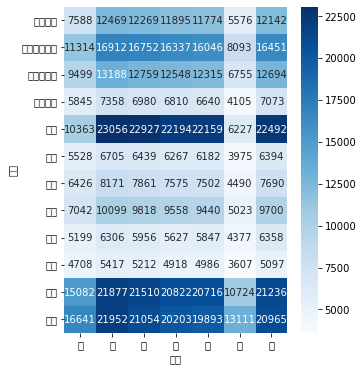

In [30]:
plt.figure(figsize=(5, 6))
sns.heatmap(pivot_df8, cmap="Blues", annot=True, fmt='.0f')

In [31]:
#9호선
df = raw[raw['노선명'] == '9호선']
pivot_df9 = pd.pivot_table(df, index='역명', columns='요일', values='승차총승객수') 
pivot_df9

요일,금,목,수,월,일,토,화
역명,,,,,,,
가양,17195.230769,23938.307692,23352.115385,22804.961538,22491.56,13435.346154,22979.730769
개화,4936.038462,8098.538462,7912.038462,7724.384615,7907.64,3359.846154,7781.692308
공항시장,2611.692308,3321.346154,3200.653846,3110.346154,3124.68,2032.923077,3144.384615
구반포,3193.461538,3507.653846,3526.769231,3327.615385,3311.96,1708.615385,3422.038462
국회의사당,7815.730769,21219.538462,19152.500000,19121.884615,18260.76,7911.346154,19544.538462
노들,3906.000000,5282.846154,5136.230769,4991.769231,4868.08,3132.192308,5125.192308
둔촌오륜,655.038462,1020.923077,972.538462,985.961538,939.16,686.769231,1032.500000
등촌,7995.461538,12043.346154,11771.884615,11448.038462,11393.20,5429.961538,11515.846154
마곡나루,5333.153846,8788.326923,8468.961538,8286.596154,7911.72,3699.211538,8366.134615


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\

<AxesSubplot:xlabel='요일', ylabel='역명'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\li

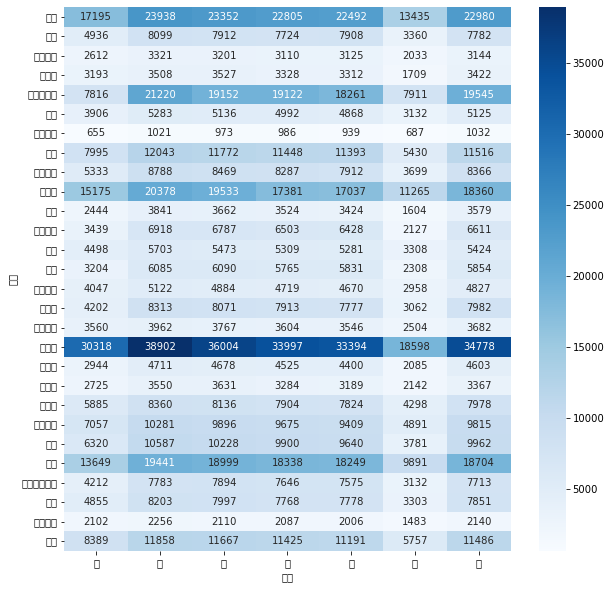

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_df9, cmap="Blues", annot=True, fmt='.0f')

# 1호선에서 가장 하차를 많이 하는 역은? (groupby)

In [33]:
station1 = raw[raw['노선명'] == '1호선']

station1 = station1.groupby(['노선명','역명'])['하차총승객수'].sum().reset_index()
station1


,노선명,역명,하차총승객수
0,1호선,가능,1237540.0
1,1호선,가산디지털단지,10571381.0
2,1호선,간석,1147764.0
3,1호선,개봉,4426314.0
4,1호선,관악,1497683.0
...,...,...,...
84,1호선,천안,1314103.0
85,1호선,평택,2596456.0
86,1호선,화서,1520118.0
87,1호선,회기,5270114.0


In [34]:
max_station1=station1[station1['하차총승객수'] == max(station1['하차총승객수'])]
max_station1

,노선명,역명,하차총승객수
1,1호선,가산디지털단지,10571381.0


# 2호선중에서 어느 역에서 승차가 많이 발생할까 (Folium역 표시)

In [35]:
station2 = raw[raw['노선명'] == '2호선']
station2 = station2.groupby(['노선명','역명'])['승차총승객수'].sum().reset_index()

station2

,노선명,역명,승차총승객수
0,2호선,강남,18148024.0
1,2호선,강변,8267462.0
2,2호선,건대입구,11123655.0
3,2호선,교대,9156484.0
4,2호선,구로디지털단지,11421335.0
5,2호선,구의,4407091.0
6,2호선,까치산,5526065.0
7,2호선,낙성대,5454622.0
8,2호선,당산,7452044.0
9,2호선,도림천,212295.0


In [36]:
max_station2=station2[station2['승차총승객수'] == max(station2['승차총승객수'])]
max_station2

,노선명,역명,승차총승객수
39,2호선,잠실,18574323.0


In [37]:
import folium
# 위도
latitude = 37.514634749
# 경도
longitude = 127.104260695

ModuleNotFoundError: No module named 'folium'

In [39]:
m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500
              )
m

NameError: name 'folium' is not defined

In [40]:
folium.Marker([latitude, longitude],
              popup="잠실역",
              tooltip="잠실역 입구").add_to(m)
m

NameError: name 'folium' is not defined

# 새로운 가설로 실습
2020년도 데이터 이용


# 2020파일을 불러와 앞서 진행한 2019파일과 동일한 형식으로

사용일자' 타입 int64 --> DateTime 타입, (요일, 연월, 월일, 승하자총승객수)칼럼 생성

In [41]:
file2 = r'.\rawfiles2\CARD_SUBWAY_MONTH_202001.csv'
pd.read_csv(file2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20200101,1호선,종각,20427,16301,20200104
1,20200101,1호선,시청,12126,10516,20200104
2,20200101,우이신설선,신설동,892,828,20200104
3,20200101,우이신설선,보문,917,855,20200104
4,20200101,우이신설선,성신여대입구(돈암),2010,2363,20200104
...,...,...,...,...,...,...
18307,20200131,우이신설선,북한산보국문,6044,5677,20200203
18308,20200131,우이신설선,정릉,4447,4187,20200203
18309,20200131,우이신설선,성신여대입구(돈암),3129,3314,20200203
18310,20200131,우이신설선,보문,1564,1649,20200203


In [42]:
raw2 = pd.read_csv(file2)
raw2.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20200101,1호선,종각,20427,16301,20200104
1,20200101,1호선,시청,12126,10516,20200104
2,20200101,우이신설선,신설동,892,828,20200104
3,20200101,우이신설선,보문,917,855,20200104
4,20200101,우이신설선,성신여대입구(돈암),2010,2363,20200104


In [43]:
import os
dirpath = 'rawfiles2'
os.listdir(dirpath)

['CARD_SUBWAY_MONTH_202001.csv',
 'CARD_SUBWAY_MONTH_202002.csv',
 'CARD_SUBWAY_MONTH_202003.csv',
 'CARD_SUBWAY_MONTH_202004.csv',
 'CARD_SUBWAY_MONTH_202005.csv',
 'CARD_SUBWAY_MONTH_202006.csv']

In [44]:
dirpath = './rawfiles2/'
files2 = os.listdir(dirpath)
files2

['CARD_SUBWAY_MONTH_202001.csv',
 'CARD_SUBWAY_MONTH_202002.csv',
 'CARD_SUBWAY_MONTH_202003.csv',
 'CARD_SUBWAY_MONTH_202004.csv',
 'CARD_SUBWAY_MONTH_202005.csv',
 'CARD_SUBWAY_MONTH_202006.csv']

In [45]:
# 여러개의 파일을 병합하겠습니다.

# 빈 데이터프레임을 준비
raw2 = pd.DataFrame()

# 반복문 -> csv 파일 읽기 -> 데이터프레임에 추가하기
for file in files2:
    print(dirpath + file)
    temp2 = pd.read_csv(dirpath + file)
    raw2 = pd.concat([raw2, temp2], axis=0, sort=False)

raw2.tail()

./rawfiles2/CARD_SUBWAY_MONTH_202001.csv
./rawfiles2/CARD_SUBWAY_MONTH_202002.csv
./rawfiles2/CARD_SUBWAY_MONTH_202003.csv
./rawfiles2/CARD_SUBWAY_MONTH_202004.csv
./rawfiles2/CARD_SUBWAY_MONTH_202005.csv
./rawfiles2/CARD_SUBWAY_MONTH_202006.csv


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
17734,20200630,장항선,쌍용(나사렛대),1744,1598,20200703
17735,20200630,장항선,봉명,1115,1034,20200703
17736,20200630,일산선,대화,13097,9865,20200703
17737,20200630,일산선,주엽,8370,8470,20200703
17738,20200630,일산선,정발산,6466,6530,20200703


In [46]:
raw = raw.reset_index(drop=True)
raw.head(7)

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104
5,2019-01-01,월,경의선,청량리,15007.0,15397.0,30404.0,2019-01,01-01,20190104
6,2019-01-01,월,1호선,제기동,10187.0,10178.0,20365.0,2019-01,01-01,20190104


In [47]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   사용일자     107028 non-null  object 
 1   요일       107028 non-null  object 
 2   노선명      107028 non-null  object 
 3   역명       107028 non-null  object 
 4   승차총승객수   107028 non-null  float64
 5   하차총승객수   107028 non-null  float64
 6   승하차총승객수  107028 non-null  float64
 7   연월       107028 non-null  object 
 8   월일       107028 non-null  object 
 9   등록일자     107028 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 8.2+ MB


In [48]:
# '사용일자' 타입 int64 --> DateTime 타입으로 변경 : pandas.to_datetime 사용

raw2['사용일자'] = pd.to_datetime(raw2['사용일자'], format='%Y%m%d')
raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107483 entries, 0 to 17738
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107483 non-null  datetime64[ns]
 1   노선명     107483 non-null  object        
 2   역명      107483 non-null  object        
 3   승차총승객수  107483 non-null  int64         
 4   하차총승객수  107483 non-null  int64         
 5   등록일자    107483 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 5.7+ MB


In [49]:
raw2.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2020-01-01,1호선,종각,20427,16301,20200104
1,2020-01-01,1호선,시청,12126,10516,20200104
2,2020-01-01,우이신설선,신설동,892,828,20200104
3,2020-01-01,우이신설선,보문,917,855,20200104
4,2020-01-01,우이신설선,성신여대입구(돈암),2010,2363,20200104


In [50]:
# 사용일자에 대해서 요일로 변환
raw2['요일'] = raw2['사용일자'].dt.dayofweek
raw2.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
17734,2020-06-30,장항선,쌍용(나사렛대),1744,1598,20200703,1
17735,2020-06-30,장항선,봉명,1115,1034,20200703,1
17736,2020-06-30,일산선,대화,13097,9865,20200703,1
17737,2020-06-30,일산선,주엽,8370,8470,20200703,1
17738,2020-06-30,일산선,정발산,6466,6530,20200703,1


In [51]:
conv = {
    0 : '일',
    1 : '월',
    2 : '화',
    3 : '수',
    4 : '목',
    5 : '금',
    6 : '토'
}
# 숫자 요일을 한글명 요일로 변경
raw2['요일'] = raw2['요일'].map(conv)

In [52]:
raw2.sample(5)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
18045,2020-05-31,경부선,신길,4258,3704,20200603,토
449,2020-04-01,6호선,안암(고대병원앞),8134,8340,20200404,화
15711,2020-01-27,수인선,연수,2998,3003,20200130,일
15023,2020-04-26,분당선,신갈,1524,1524,20200429,토
11431,2020-05-20,경의선,공덕,3290,3016,20200523,화


In [53]:
#연월 컬럼 생성
# pandas.Series.dt.strftime 활용
raw2['사용일자'].dt.strftime('%Y-%m')
# 사용일자 컬럼에서 년월 값을 가져와 년월 컬럼 만들자

raw2['연월'] = raw2['사용일자'].dt.strftime('%Y-%m')
raw2.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월
0,2020-01-01,1호선,종각,20427,16301,20200104,화,2020-01
1,2020-01-01,1호선,시청,12126,10516,20200104,화,2020-01
2,2020-01-01,우이신설선,신설동,892,828,20200104,화,2020-01
3,2020-01-01,우이신설선,보문,917,855,20200104,화,2020-01
4,2020-01-01,우이신설선,성신여대입구(돈암),2010,2363,20200104,화,2020-01


In [54]:
# pandas.Series.dt.strftime 활용
raw2['사용일자'].dt.strftime('%m-%d')
# 사용일자 컬럼에서 월일 값을 가져와 월일 컬럼 만들자

raw2['월일'] = raw2['사용일자'].dt.strftime('%m-%d')
raw2.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,2020-01-01,1호선,종각,20427,16301,20200104,화,2020-01,01-01
1,2020-01-01,1호선,시청,12126,10516,20200104,화,2020-01,01-01
2,2020-01-01,우이신설선,신설동,892,828,20200104,화,2020-01,01-01
3,2020-01-01,우이신설선,보문,917,855,20200104,화,2020-01,01-01
4,2020-01-01,우이신설선,성신여대입구(돈암),2010,2363,20200104,화,2020-01,01-01


In [55]:
# 승하차총승객수 컬럼 생성 : 승차총승객수 + 하차총승객수
raw2['승하차총승객수'] = raw2['승차총승객수'] + raw2['하차총승객수']
# 요일을 사용일자 다음에 나오도록 컬럼순서를 변경하겠습니다.

# 현재 컬럼명 확인
print(raw2.columns)

raw2 = raw2[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw2.head()


Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자', '요일', '연월', '월일',
       '승하차총승객수'],
      dtype='object')


,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2020-01-01,화,1호선,종각,20427,16301,36728,2020-01,01-01,20200104
1,2020-01-01,화,1호선,시청,12126,10516,22642,2020-01,01-01,20200104
2,2020-01-01,화,우이신설선,신설동,892,828,1720,2020-01,01-01,20200104
3,2020-01-01,화,우이신설선,보문,917,855,1772,2020-01,01-01,20200104
4,2020-01-01,화,우이신설선,성신여대입구(돈암),2010,2363,4373,2020-01,01-01,20200104


In [56]:
# 승하자총승객수 컬럼 생성 : 승차총승객수 + 하차총승객수
raw2['승하차총승객수'] = raw2['승차총승객수'] + raw2['하차총승객수']

In [57]:
# 요일을 사용일자 다음에 나오도록 컬럼순서를 변경하겠습니다.

# 현재 컬럼명 확인
print(raw.columns)

raw2 = raw2[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw2.head()


Index(['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일',
       '등록일자'],
      dtype='object')


,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2020-01-01,화,1호선,종각,20427,16301,36728,2020-01,01-01,20200104
1,2020-01-01,화,1호선,시청,12126,10516,22642,2020-01,01-01,20200104
2,2020-01-01,화,우이신설선,신설동,892,828,1720,2020-01,01-01,20200104
3,2020-01-01,화,우이신설선,보문,917,855,1772,2020-01,01-01,20200104
4,2020-01-01,화,우이신설선,성신여대입구(돈암),2010,2363,4373,2020-01,01-01,20200104


In [58]:
# 작업한 결과를 data 폴더에 저장하겠습니다.

fpath = './subway_raw2.csv'
raw2.to_csv(fpath, index=False, encoding='utf-8-sig')

raw = 2019.01 ~ 2019.06 데이터

raw2 = 2020.01 ~ 2020.06 데이터(가설을 위해 새로 추가한 데이터)

# 가설1. 
코로나가 발생한 2020년도는 2019년에 비해 '월별 지하철 승하차총승객수'가 감소했을 것이다.

In [59]:
ym_group1 = raw.groupby(['연월'])['승하차총승객수'].sum().reset_index()
ym_group2 = raw2.groupby(['연월'])['승하차총승객수'].sum().reset_index()

In [60]:
ym_group1

,연월,승하차총승객수
0,2019-01,442746389.0
1,2019-02,379836010.0
2,2019-03,466692826.0
3,2019-04,470934348.0
4,2019-05,485718557.0
5,2019-06,442210635.0


In [61]:
ym_group2

,연월,승하차총승객수
0,2020-01,414682647
1,2020-02,338641156
2,2020-03,278995559
3,2020-04,297802722
4,2020-05,329632420
5,2020-06,343745137


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


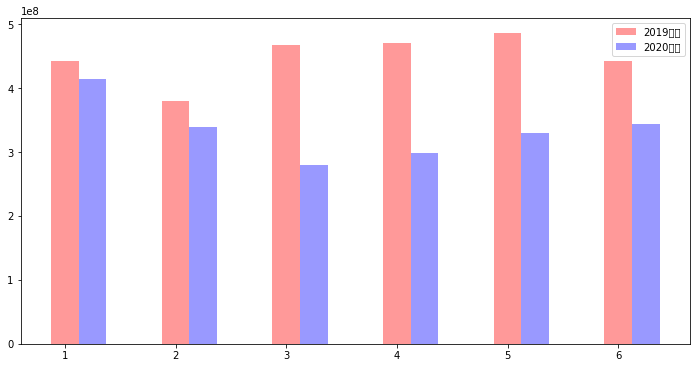

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 인덱스 = 월 (1,2,3,4,5,6)
index = np.arange(1, 7)

# 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, ym_group1['승하차총승객수'], bar_width, alpha=0.4, color='red', label='2019년도')
b2 = plt.bar(index + bar_width, ym_group2['승하차총승객수'], bar_width, alpha=0.4, color='blue', label='2020년도')

plt.legend()
plt.show()

코로나가 발생한 2월 이후로 월별 지하철 승하차총승객수가 감소한 것을 그래프를 통해 알 수 있다.

가설1. 코로나가 발생한 2020년도는 2019년도 보다 '월별 지하철 승하차총승객수'가 감소했을 것이다. -> 성립

# 가설2. 
코로나가 발생한 그 다음달인 2월부터 주말 이용객이 감소했을것이다

In [68]:
# 주말 이용객 구하기
weekend = (raw['요일'] == '토') | (raw['요일'] == '일')
raw_weekend = raw[weekend]
weekend_2 = (raw2['요일'] == '토') | (raw2['요일'] == '일')
raw2_weekend = raw2[weekend_2]

In [69]:
raw_weekend.sample(5)

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
28611,2019-02-18,일,1호선,세마,3058.0,2860.0,5918.0,2019-02,02-18,20190221
4006,2019-01-07,일,1호선,석계,14218.0,14556.0,28774.0,2019-01,01-07,20190110
45518,2019-03-18,일,우이신설경전철,삼양,2357.0,2580.0,4937.0,2019-03,03-18,20190321
40463,2019-03-10,토,3호선,원흥,5107.0,4870.0,9977.0,2019-03,03-10,20190313
53504,2019-04-01,일,분당선,수원시청,12200.0,13293.0,25493.0,2019-04,04-01,20190404


In [70]:
raw_weekend_group = raw_weekend.groupby(['연월'])['승하차총승객수'].sum().reset_index()
raw_weekend_group

,연월,승하차총승객수
0,2019-01,98088752.0
1,2019-02,88796591.0
2,2019-03,114897940.0
3,2019-04,123224805.0
4,2019-05,100855505.0
5,2019-06,113215953.0


In [71]:
raw2_weekend_group = raw2_weekend.groupby(['연월'])['승하차총승객수'].sum().reset_index()
raw2_weekend_group

,연월,승하차총승객수
0,2020-01,89359361
1,2020-02,80825705
2,2020-03,74262606
3,2020-04,66829669
4,2020-05,79005425
5,2020-06,88548542


<AxesSubplot:xlabel='연월', ylabel='승하차총승객수'>

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda

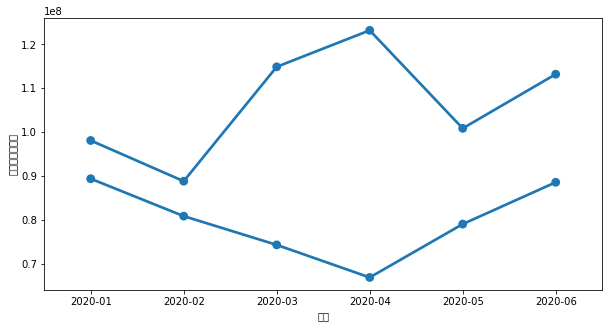

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(x=raw_weekend_group['연월'], y=raw_weekend_group['승하차총승객수'])
sns.pointplot(x=raw2_weekend_group['연월'], y=raw2_weekend_group['승하차총승객수'])

#### 전체적인 주말 이용객이 줄어들었고,
#### 특히 2019년도 이용객이 가장 많은 달 이었던 4월달이 2020년에는 가장 적게 이용했다

# 가설 3.

가설 1이 성립했다면,코로나가 발생한 2020년도는 2019년에 비해 '월별 버스 승하차 수' 또한 감소했을 것이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
from scipy import stats

In [2]:
import os
dirpath = './bus_data/BUS_STATION_BOARDING_MONTH_2019/'
files =os.listdir(dirpath)

In [3]:
BusRaw2019 = pd.DataFrame()
# 반복문 -> csv 파일 읽기 -> 데이터프레임에 추가하기
for file in files:
    print(dirpath + file)
    temp3 = pd.read_csv(dirpath + file, encoding='CP949')
    BusRaw2019 = pd.concat([BusRaw2019, temp3], axis=0, sort=False)

BusRaw2019.tail()

./bus_data/BUS_STATION_BOARDING_MONTH_2019/BUS_STATION_BOARDING_MONTH_201901.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2019/BUS_STATION_BOARDING_MONTH_201902.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2019/BUS_STATION_BOARDING_MONTH_201903.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2019/BUS_STATION_BOARDING_MONTH_201904.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2019/BUS_STATION_BOARDING_MONTH_201905.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2019/BUS_STATION_BOARDING_MONTH_201906.csv


,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1151365,20190630,401,401번(장지공영차고지~서울역),24447,장지공영차고지,0,9,20190703
1151366,20190630,401,401번(장지공영차고지~서울역),24461,서울버스종점,0,7,20190703
1151367,20190630,401,401번(장지공영차고지~서울역),24471,아이코리아앞,0,3,20190703
1151368,20190630,401,401번(장지공영차고지~서울역),24462,송파파인타운2단지.구립송파복지센터,2,30,20190703
1151369,20190630,401,401번(장지공영차고지~서울역),24465,송파글마루도서관.버들어린이집,1,15,20190703


In [4]:
BusRaw2019 = BusRaw2019.reset_index(drop=True)
BusRaw2019.head(7)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20190101,100,100번(하계동~용산구청),11428,한성여객종점,10,0,20190104
1,20190101,100,100번(하계동~용산구청),11387,노원평생학습관,5,0,20190104
2,20190101,100,100번(하계동~용산구청),11373,중계역,27,1,20190104
3,20190101,100,100번(하계동~용산구청),11381,중계목화아파트4단지,110,12,20190104
4,20190101,100,100번(하계동~용산구청),11311,인덕대학,87,76,20190104
5,20190101,100,100번(하계동~용산구청),01198,원남동,34,76,20190104
6,20190101,100,100번(하계동~용산구청),11340,월계헬스케어센터,55,143,20190104


In [5]:
BusRaw2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926636 entries, 0 to 6926635
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   사용일자        int64 
 1   노선번호        object
 2   노선명         object
 3   버스정류장ARS번호  object
 4   역명          object
 5   승차총승객수      int64 
 6   하차총승객수      int64 
 7   등록일자        int64 
dtypes: int64(4), object(4)
memory usage: 422.8+ MB


In [6]:
BusRaw2019['사용일자'] = pd.to_datetime(BusRaw2019['사용일자'], format='%Y%m%d')
BusRaw2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926636 entries, 0 to 6926635
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   사용일자        datetime64[ns]
 1   노선번호        object        
 2   노선명         object        
 3   버스정류장ARS번호  object        
 4   역명          object        
 5   승차총승객수      int64         
 6   하차총승객수      int64         
 7   등록일자        int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 422.8+ MB


In [7]:
BusRaw2019['사용일자'].dt.strftime('%Y-%m')
BusRaw2019['연월'] = BusRaw2019['사용일자'].dt.strftime('%Y-%m')
BusRaw2019.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,연월
0,2019-01-01,100,100번(하계동~용산구청),11428,한성여객종점,10,0,20190104,2019-01
1,2019-01-01,100,100번(하계동~용산구청),11387,노원평생학습관,5,0,20190104,2019-01
2,2019-01-01,100,100번(하계동~용산구청),11373,중계역,27,1,20190104,2019-01
3,2019-01-01,100,100번(하계동~용산구청),11381,중계목화아파트4단지,110,12,20190104,2019-01
4,2019-01-01,100,100번(하계동~용산구청),11311,인덕대학,87,76,20190104,2019-01


In [8]:
BusRaw2019['승하차총승객수'] = BusRaw2019['승차총승객수'] + BusRaw2019['하차총승객수']

In [9]:
print(BusRaw2019.columns)

Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자',
       '연월', '승하차총승객수'],
      dtype='object')


In [10]:
BusRaw2019.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,연월,승하차총승객수
0,2019-01-01,100,100번(하계동~용산구청),11428,한성여객종점,10,0,20190104,2019-01,10
1,2019-01-01,100,100번(하계동~용산구청),11387,노원평생학습관,5,0,20190104,2019-01,5
2,2019-01-01,100,100번(하계동~용산구청),11373,중계역,27,1,20190104,2019-01,28
3,2019-01-01,100,100번(하계동~용산구청),11381,중계목화아파트4단지,110,12,20190104,2019-01,122
4,2019-01-01,100,100번(하계동~용산구청),11311,인덕대학,87,76,20190104,2019-01,163


In [11]:
fpath = './bus_data/BusRaw2019.csv'
BusRaw2019.to_csv(fpath, index=False, encoding='utf-8-sig')

In [12]:
dirpath = './bus_data/BUS_STATION_BOARDING_MONTH_2020/'
files =os.listdir(dirpath)

BusRaw2020 = pd.DataFrame()
# 반복문 -> csv 파일 읽기 -> 데이터프레임에 추가하기
for file in files:
    print(dirpath + file)
    temp4 = pd.read_csv(dirpath + file)
    BusRaw2020 = pd.concat([BusRaw2020, temp4], axis=0, sort=False)

BusRaw2020.tail()

./bus_data/BUS_STATION_BOARDING_MONTH_2020/BUS_STATION_BOARDING_MONTH_202001.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2020/BUS_STATION_BOARDING_MONTH_202002.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2020/BUS_STATION_BOARDING_MONTH_202003.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2020/BUS_STATION_BOARDING_MONTH_202004.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2020/BUS_STATION_BOARDING_MONTH_202005.csv
./bus_data/BUS_STATION_BOARDING_MONTH_2020/BUS_STATION_BOARDING_MONTH_202006.csv


,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1162348,20200630,9714,9714번(교하운정~서울역),63657,트리플메디컬타운,90,1,20200703
1162349,20200630,9714,9714번(교하운정~서울역),63659,중앙공원,32,0,20200703
1162350,20200630,9714,9714번(교하운정~서울역),63674,책향기마을,38,1,20200703
1162351,20200630,9714,9714번(교하운정~서울역),36601,대화역,18,71,20200703
1162352,20200630,9714,9714번(교하운정~서울역),36691,문촌마을(중),5,1,20200703


In [13]:
BusRaw2020 = BusRaw2020.reset_index(drop=True)
BusRaw2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7028960 entries, 0 to 7028959
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   사용일자        int64 
 1   노선번호        object
 2   노선명         object
 3   버스정류장ARS번호  object
 4   역명          object
 5   승차총승객수      int64 
 6   하차총승객수      int64 
 7   등록일자        int64 
dtypes: int64(4), object(4)
memory usage: 429.0+ MB


In [14]:
BusRaw2020['사용일자'] = pd.to_datetime(BusRaw2020['사용일자'], format = '%Y%m%d')
BusRaw2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7028960 entries, 0 to 7028959
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   사용일자        datetime64[ns]
 1   노선번호        object        
 2   노선명         object        
 3   버스정류장ARS번호  object        
 4   역명          object        
 5   승차총승객수      int64         
 6   하차총승객수      int64         
 7   등록일자        int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 429.0+ MB


In [15]:
BusRaw2020['사용일자'].dt.strftime('%Y-%m')
BusRaw2020['연월'] = BusRaw2020['사용일자'].dt.strftime('%Y-%m')

In [16]:
BusRaw2020['승하차총승객수'] = BusRaw2020['승차총승객수'] + BusRaw2020['하차총승객수']

In [17]:
BusRaw2020 = BusRaw2020[['사용일자', '연월', '노선번호', '노선명', '역명', '승차총승객수', '하차총승객수','승하차총승객수']]
BusRaw2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7028960 entries, 0 to 7028959
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   사용일자     datetime64[ns]
 1   연월       object        
 2   노선번호     object        
 3   노선명      object        
 4   역명       object        
 5   승차총승객수   int64         
 6   하차총승객수   int64         
 7   승하차총승객수  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 429.0+ MB


In [18]:
fpath = './bus_data/BusRaw2020.csv'
BusRaw2020.to_csv(fpath, index=False, encoding='utf-8-sig')

In [19]:
Bus_group1 = BusRaw2019.groupby(['연월'])['승하차총승객수'].sum().reset_index()
Bus_group2 = BusRaw2020.groupby(['연월'])['승하차총승객수'].sum().reset_index()

In [20]:
Bus_group1

,연월,승하차총승객수
0,2019-01,301629497
1,2019-02,259399753
2,2019-03,317849399
3,2019-04,319001913
4,2019-05,328322227
5,2019-06,304890166


In [21]:
Bus_group2

,연월,승하차총승객수
0,2020-01,283850413
1,2020-02,243255973
2,2020-03,208005210
3,2020-04,218092607
4,2020-05,239902487
5,2020-06,254204283


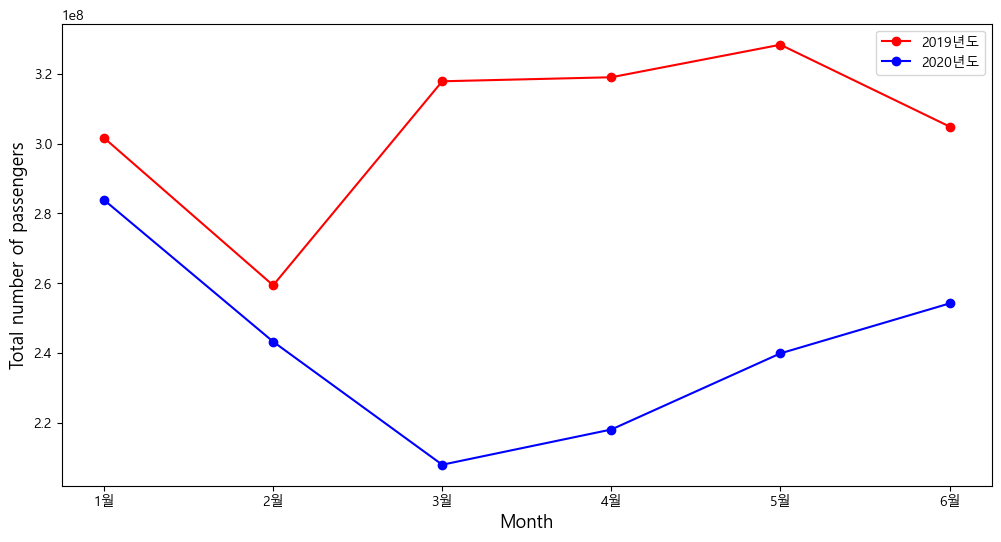

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

fig, ax = plt.subplots(figsize=(12,6))


# 인덱스 = 월 (1,2,3,4,5,6)
index = ['1월','2월','3월','4월','5월','6월']

# 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.plot(index, Bus_group1['승하차총승객수'], color='red', label='2019년도', marker = 'o')
b2 = plt.plot(index, Bus_group2['승하차총승객수'], color='blue', label='2020년도', marker = 'o')
plt.xlabel('Month', size = 13)
plt.ylabel('Total number of passengers', size = 13)
plt.legend()
plt.show()

2020년도 5~7월 데이터가 없었지만, 2019년도에 비해 2020년 버스 총이용객 수가 줄었음을 확인할 수 있다.
버스 또한 코로나의 영향을 받았음을 알수있다. 즉, 가설 1이 성립했다면,코로나가 발생한 2020년도는 2019년에 비해 '월별 버스 승하차 수' 또한 감소했을 것이다. -> 성립

하지만 2019년 3월과 2020년 3월의 값이 너무 많이 차이나는 점이 이상해 통계적 유의성 검사를 진행함.

In [24]:
tTestResult = stats.ttest_ind(BusRaw2019['승하차총승객수'], BusRaw2020['승하차총승객수'])

tTestResultDiffVar = stats.ttest_ind(BusRaw2019['승하차총승객수'], BusRaw2020['승하차총승객수'], equal_var=False)

In [25]:
tTestResultDiffVar

Ttest_indResult(statistic=378.7843766336258, pvalue=0.0)

In [26]:
tTestResult

Ttest_indResult(statistic=379.45924550803994, pvalue=0.0)

In [27]:
pearson_coef, p_value = stats.pearsonr(BusRaw2019['연월'] =='2019-03', BusRaw2019['승하차총승객수'])

In [28]:
print('pearson_coef = {0}, p_value = {1}'.format(pearson_coef, p_value))

pearson_coef = 0.00686655026237441, p_value = 5.3014210512201227e-73


In [29]:
pearson_coef, p_value = stats.pearsonr(BusRaw2020['연월'] =='2020-03', BusRaw2020['승하차총승객수'])
print('pearson_coef = {0}, p_value = {1}'.format(pearson_coef, p_value))

pearson_coef = -0.05777663674719768, p_value = 0.0
